<a href="https://colab.research.google.com/github/Rushdi-Rzx/Adult-Census-Income/blob/main/MLCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Load the Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [ ]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [ ]:
#adding the income column into the X dataframe
X["income"] = y

In [ ]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
X.shape

(48842, 15)

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Drop Null Values

In [ ]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [ ]:
X = X.dropna()

In [ ]:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
X.nunique()

age                  74
workclass             9
fnlwgt            27946
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        122
capital-loss         98
hours-per-week       96
native-country       42
income                4
dtype: int64

In [ ]:
X[['income']]

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48836,<=50K.
48837,<=50K.
48839,<=50K.
48840,<=50K.


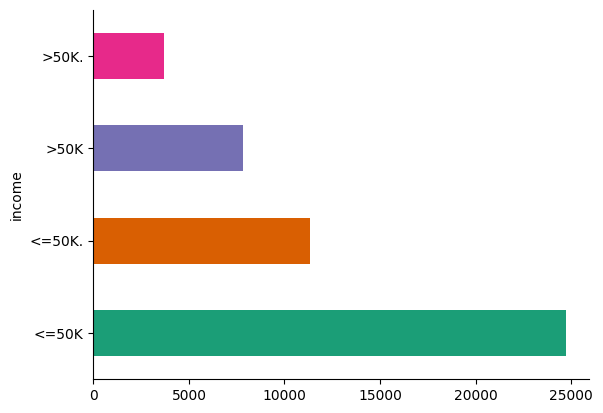

In [ ]:
X.groupby('income').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Remove Punctuations in Income

In [ ]:
X['income'] = X['income'].str.replace('>50K.','>50K')
X['income'] = X['income'].str.replace('<=50K.','<=50K')

<ipython-input-328-f135aa0a2838>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X['income'] = X['income'].str.replace('>50K.','>50K')
<ipython-input-328-f135aa0a2838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['income'] = X['income'].str.replace('>50K.','>50K')
<ipython-input-328-f135aa0a2838>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X['income'] = X['income'].str.replace('<=50K.','<=50K')
<ipython-input-328-f135aa0a2838>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
X['income'].nunique()

2

# Value Count Function

In [ ]:
X['workclass'].value_counts()

Private             33717
Self-emp-not-inc     3838
Local-gov            3126
State-gov            1965
?                    1836
Self-emp-inc         1688
Federal-gov          1423
Without-pay            21
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
X['occupation'].value_counts()

Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
?                    1843
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: occupation, dtype: int64

In [ ]:
X['native-country'].value_counts()

United-States                 42958
Mexico                          936
?                               583
Philippines                     293
Germany                         202
Puerto-Rico                     180
Canada                          177
El-Salvador                     153
India                           147
Cuba                            136
England                         123
China                           120
South                           110
Italy                           105
Jamaica                         104
Dominican-Republic              100
Japan                            92
Guatemala                        87
Vietnam                          86
Poland                           85
Columbia                         85
Haiti                            71
Portugal                         65
Taiwan                           64
Iran                             57
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
X['income'].value_counts()

<=50K    36080
>50K     11541
Name: income, dtype: int64

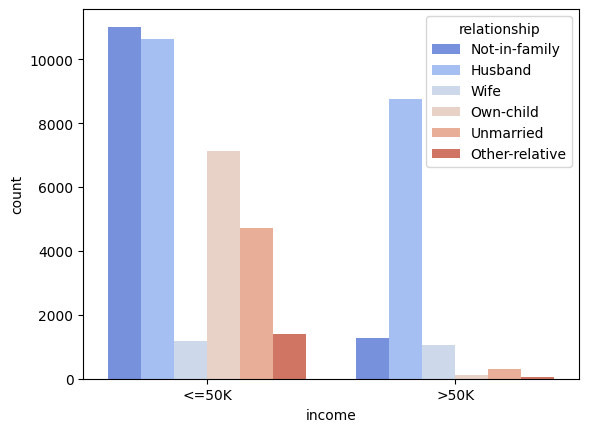

In [ ]:
sns.countplot(x='income', palette='coolwarm', hue='relationship', data=X);

# Handling ? values

In [ ]:
X.replace('?', np.NaN,inplace = True)

<ipython-input-335-63759e0c97a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.NaN,inplace = True)


In [ ]:
X.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
X = X.dropna()

# Finding Duplicates

In [ ]:
duplicates = X[X.duplicated()]
duplicates.shape

(47, 15)

In [ ]:
X = X.drop_duplicates()

In [ ]:
duplicates = X[X.duplicated()]
duplicates.shape

(0, 15)

# Feature Engineering

In [ ]:
#Grouping work class
X['workclass'] = X['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Goverment')
X['workclass'] = X['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'], 'Self-Employed')
X['workclass'] = X['workclass'].replace(['Without-pay', 'Never-worked'], 'Unemployed')

#Grouping education
X['education'] = X['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
X['education'] = X['education'].replace('HS-grad', 'high school')
X['education'] = X['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
X['education'] = X['education'].replace('Bachelors', 'undergraduate')
X['education'] = X['education'].replace('Masters', 'graduate')

#Grouping martial status
X['marital-status'] = X['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Separated', 'Married-spouse-absent'], 'Married')
X['marital-status'] = X['marital-status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Un-Married')


#Grouping Occupation
X['occupation'] = X['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'Professional')
X['occupation'] = X['occupation'].replace(['Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Tech-support'], 'Service')
X['occupation'] = X['occupation'].replace(['Sales', 'Craft-repair'], 'Sales')
X['occupation'] = X['occupation'].replace(['Other-service', 'Armed-Forces', 'Priv-house-serv'], 'Other')

Duplicate

In [ ]:
duplicates = X[X.duplicated()]
duplicates.shape

(33, 15)

In [ ]:
X = X.drop_duplicates()

In [ ]:
duplicates = X[X.duplicated()]
duplicates.shape

(0, 15)

# Feature Scalling

In [ ]:
from sklearn.preprocessing import LabelEncoder
X= X.apply(LabelEncoder().fit_transform)
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,0,3217,5,12,1,3,1,4,1,26,0,39,38,0
1,33,2,3519,5,12,0,1,0,4,1,0,0,12,38,0
2,21,1,17196,2,8,1,3,1,4,1,0,0,39,38,0
3,36,1,18738,4,6,0,3,0,2,1,0,0,39,38,0
4,11,1,23828,5,12,0,1,5,2,0,0,0,39,4,0


# Correlations

In [ ]:
X.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.068255,-0.077586,-0.059689,0.037343,-0.313011,-0.026678,-0.247485,0.024326,0.081772,0.126892,0.063192,0.101820,-0.003522,0.236607
workclass,0.068255,1.000000,-0.020371,0.017009,-0.071950,-0.091222,-0.012077,-0.086748,0.087813,0.119290,0.038664,0.020944,0.102148,-0.020662,0.023015
fnlwgt,-0.077586,-0.020371,1.000000,0.017211,-0.040828,0.018609,0.023007,0.007696,-0.014782,0.028106,-0.007380,-0.003472,-0.018662,-0.066585,-0.006396
education,-0.059689,0.017009,0.017211,1.000000,0.039868,0.017043,-0.047267,-0.006539,0.003236,0.001508,0.003748,-0.002330,-0.032316,-0.032630,0.019483
education-num,0.037343,-0.071950,-0.040828,0.039868,1.000000,-0.049364,-0.192548,-0.088690,0.031778,0.003617,0.153919,0.085070,0.147645,0.092180,0.333048
marital-status,-0.313011,-0.091222,0.018609,0.017043,-0.049364,1.000000,-0.030269,0.457489,-0.058092,-0.390037,-0.131828,-0.075663,-0.217885,0.032458,-0.411393
occupation,-0.026678,-0.012077,0.023007,-0.047267,-0.192548,-0.030269,1.000000,-0.036080,0.009160,0.102245,-0.049837,-0.027353,0.044488,0.033638,-0.100140
relationship,-0.247485,-0.086748,0.007696,-0.006539,-0.088690,0.457489,-0.036080,1.000000,-0.118467,-0.583239,-0.093543,-0.061161,-0.260393,-0.007223,-0.253357
race,0.024326,0.087813,-0.014782,0.003236,0.031778,-0.058092,0.009160,-0.118467,1.000000,0.089124,0.025874,0.021377,0.045173,0.124492,0.070976
sex,0.081772,0.119290,0.028106,0.001508,0.003617,-0.390037,0.102245,-0.583239,0.089124,1.000000,0.077157,0.050051,0.232462,-0.004265,0.215752


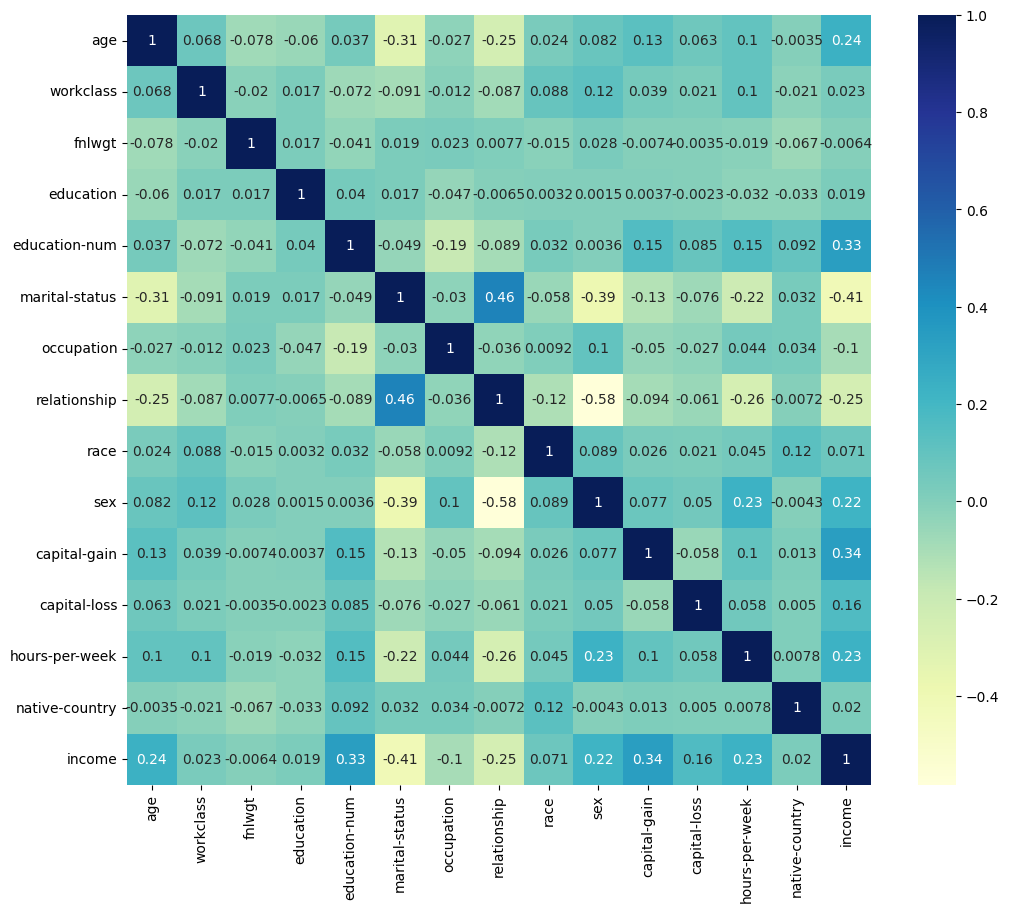

In [ ]:
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

Drop fnlwgt

In [ ]:
X=X.drop(['fnlwgt','education','native-country','occupation','relationship'], axis = 1)
X.head()

,age,workclass,education-num,marital-status,race,sex,capital-gain,capital-loss,hours-per-week,income
0,22,0,12,1,4,1,26,0,39,0
1,33,2,12,0,4,1,0,0,12,0
2,21,1,8,1,4,1,0,0,39,0
3,36,1,6,0,2,1,0,0,39,0
4,11,1,12,0,2,0,0,0,39,0


Data Inbalance

In [ ]:
X['income'].value_counts()

0    33943
1    11199
Name: income, dtype: int64

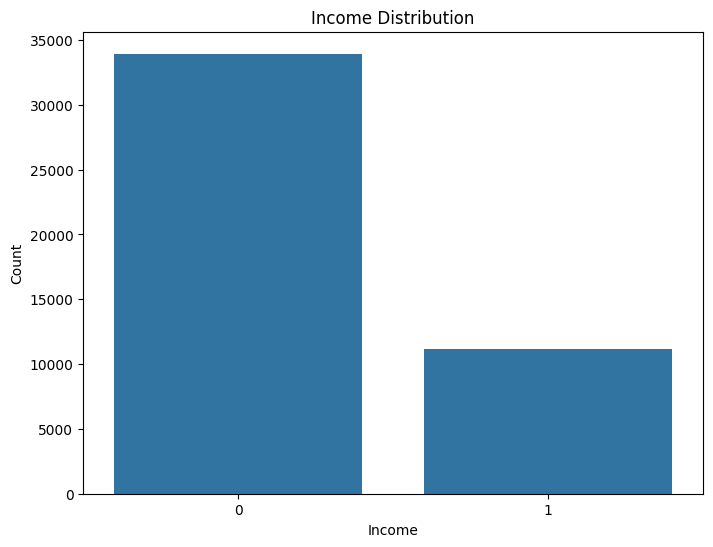

In [ ]:
income_counts = X['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Create X and y variables

Y = X['income']
X = X.drop('income', axis=1)



# Initialize the RandomOverSampler
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Create a new balanced DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)

# Now, 'balanced_df' contains the balanced dataset

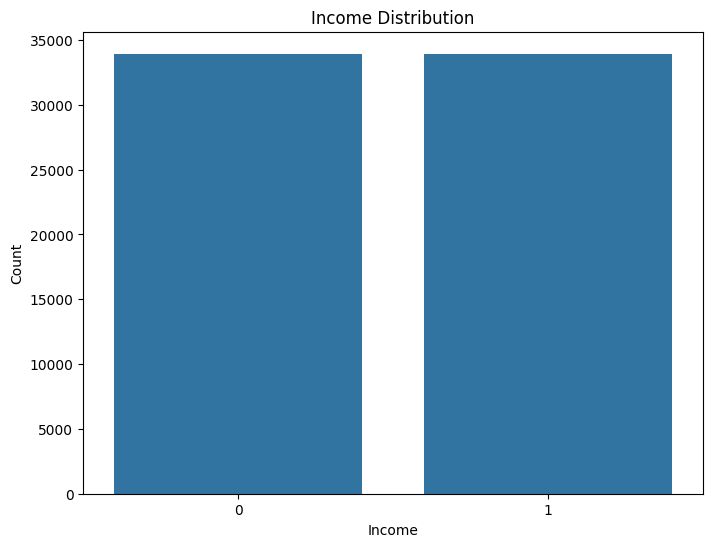

In [ ]:
income_counts = df['income'].value_counts()

# Plot the income distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [ ]:
x = df.drop((['income']), axis = 1)
y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)
prediction_nb = gb.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     10235
           1       0.82      0.68      0.75     10131

    accuracy                           0.77     20366
   macro avg       0.78      0.77      0.77     20366
weighted avg       0.78      0.77      0.77     20366



In [ ]:
print(confusion_matrix(y_test,prediction_nb))

[[8773 1462]
 [3248 6883]]


In [ ]:
print(accuracy_score(y_test,prediction_nb)*100)

76.87322007267014


In [ ]:
print("Acc on training data: {:,.3f}".format(gb.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(gb.score(x_test, y_test)))

Acc on training data: 0.766
Acc on test data: 0.769


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state=42)

model = rfc.fit(x_train, y_train)
prediction_rfc = model.predict(x_test)

print("Acc on training data: {:,.3f}".format(rfc.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(x_test, y_test)))

Acc on training data: 0.922
Acc on test data: 0.856


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(confusion_matrix(y_test, prediction_rfc))


[[8330 1905]
 [1035 9096]]


In [ ]:
print(classification_report(y_test, prediction_rfc))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10235
           1       0.83      0.90      0.86     10131

    accuracy                           0.86     20366
   macro avg       0.86      0.86      0.86     20366
weighted avg       0.86      0.86      0.86     20366



In [ ]:
print(accuracy_score(y_test,prediction_rfc)*100)

85.56417558676225
